In [1]:
import json
import requests
from pprint import pprint
from config import api_key
import pandas as pd

In [2]:
#Setting up the URL to request the list of sessions from
url = "	https://api.legiscan.com/"
api_key = "?key="+api_key

In [4]:
# Getting the list of available datasets
list_json = requests.get(url + api_key + "&op=getDatasetList&state=VA").json()
pprint(json.dumps(list_json, indent=4, sort_keys=False))

('{\n'
 '    "status": "OK",\n'
 '    "datasetlist": [\n'
 '        {\n'
 '            "state_id": 46,\n'
 '            "session_id": 1988,\n'
 '            "year_start": 2023,\n'
 '            "year_end": 2023,\n'
 '            "prefile": 0,\n'
 '            "sine_die": 0,\n'
 '            "prior": 0,\n'
 '            "special": 0,\n'
 '            "session_tag": "Regular Session",\n'
 '            "session_title": "2023 Regular Session",\n'
 '            "session_name": "2023 Regular Session",\n'
 '            "dataset_date": "2023-04-02",\n'
 '            "dataset_hash": "b27db134d976a9f39d0da93f48578b92",\n'
 '            "dataset_size": 11208118,\n'
 '            "access_key": "4R9MZZzCuMvKl7fHBnXkha"\n'
 '        },\n'
 '        {\n'
 '            "state_id": 46,\n'
 '            "session_id": 1975,\n'
 '            "year_start": 2022,\n'
 '            "year_end": 2022,\n'
 '            "prefile": 0,\n'
 '            "sine_die": 1,\n'
 '            "prior": 1,\n'
 '            "s

In [5]:
#Collecting the session info into lists that I will use to create a dataframe
session_id_list=[]
session_title_list=[]
access_key_list=[]
year_list=[]
#No session goes between years so I am just going to use the year end start date as a way of grouping years for later use
for session in list_json['datasetlist']:
    session_id_list.append(session['session_id'])
    session_title_list.append(session['session_title'])
    access_key_list.append(session['access_key'])
    year_list.append(session['year_start'])


    
    

In [10]:
sessions_df=pd.read_csv("Sessions_df.csv")

In [11]:
# Creating the url format to make my requests
master_list_url = url + api_key + "&op=getMasterList&id="

In [12]:
# Creating lists to fill with my desired info on the bills from each session
results=[]
bill_number=[]
bill_id=[]
bill_status=[]
description=[]
bill_url=[]
bill_date=[]

In [49]:
search_key=str(input("What keyword would you like to search for today? "))

What keyword would you like to search for today? behavioral health


In [50]:
print(search_key)

behavioral health


In [52]:
# Creating a loop that collects bills in the search parameters
search_key="behavioral health"

for index, row in sessions_df.iterrows():
    session_json = requests.get(master_list_url + str(row["Session_ID"])).json()
    bill_list=session_json["masterlist"]
    
    
    for key in bill_list:
        if key == "session":
            continue
        bill = bill_list[key]
        if bill['description'] is not None:
            if search_key in bill['description']:
                results.append(bill['title'])
                bill_number.append(bill['number'])
                bill_id.append(bill['bill_id'])
                bill_status.append(bill['status'])
                description.append(bill['description'])
                bill_url.append(bill['url'])
                bill_date.append(bill['status_date'])
        

In [53]:
# Generating a dataframe from the collected data
results_df = pd.DataFrame({
                        "Bill ID": bill_id,
                        "Bill Number": bill_number,
                        "Bill Title": results,
                        "Bill Status": bill_status,
                        "Bill Description": description,
                        "Bill Date": bill_date,
                        "Bill URL": bill_url
    
})    



In [41]:
len(results_df['Bill Title'])

49949

In [39]:
results_df.head()

,Bill ID,Bill Number,Bill Title,Bill Status,Bill Description,Bill Date,Bill URL
0,1630740,HB105,Catawba Hospital; DGS to study feasibility of ...,2,Department of Behavioral Health and Developmen...,2022-02-10,https://legiscan.com/VA/bill/HB105/2023
1,1630759,HB1232,Behavioral Health Commission; increases member...,2,Behavioral Health Commission; membership. Adds...,2022-02-10,https://legiscan.com/VA/bill/HB1232/2023
2,1650270,HB1791,Veterans' Behavioral Health Services Grant Mat...,1,Veterans' Behavioral Health Services Grant Mat...,2023-01-10,https://legiscan.com/VA/bill/HB1791/2023
3,1651504,HB1900,Behavioral health and developmental services; ...,3,Provisional licenses issued to providers of be...,2023-02-24,https://legiscan.com/VA/bill/HB1900/2023
4,1651277,HB1908,Criminal proceedings; disposition when defenda...,4,Criminal proceedings; disposition when defenda...,2023-03-22,https://legiscan.com/VA/bill/HB1908/2023


In [59]:
results_df=pd.read_csv('trial.csv')

In [60]:
bills_clean=results_df.dropna()

In [64]:
search=bills_clean.loc[bills_clean['Bill Description'].str.contains("behavioral health", case=False)]

In [57]:
import matplotlib.pyplot as plt

In [65]:
x_axis = search['Bill Status'].unique()
values = search['Bill Status'].value_counts()

<BarContainer object of 6 artists>

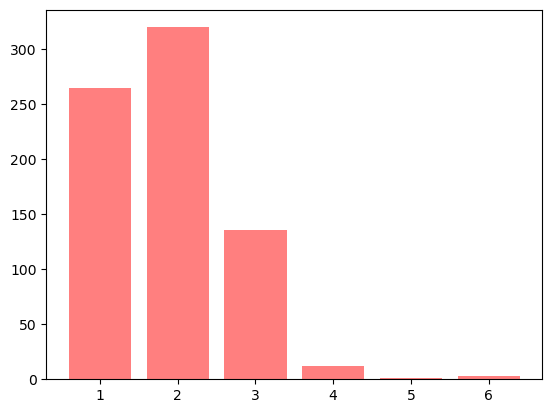

In [68]:
status_plt=plt.bar(x_axis, values, color='r', alpha=0.5, align="center")
status_plt

In [ ]:
search_df.loc[search_df['Bill Status']==5]

In [69]:
year= search['Bill Date'].unique()
count= search['Bill Date'].value_counts()

<BarContainer object of 15 artists>

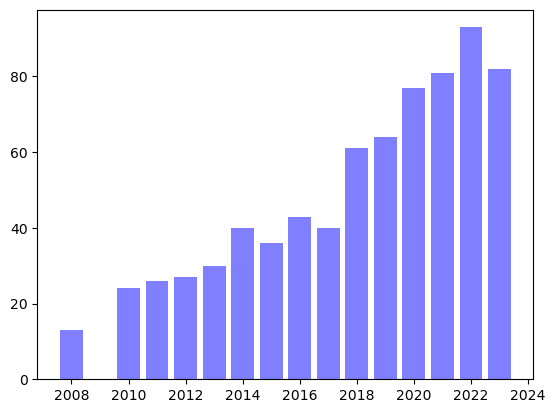

In [70]:
year_plt=plt.bar(year, count, color='b', alpha=0.5, align="center")
year_plt